- userid:
Уникальный идентификатор пользователя.
Пример: 1001 — пользователь с идентификатором 1001.

- Average Screen Time:
Среднее время, проведенное пользователем в приложении, в минутах.
Пример: 17.0 — пользователь в среднем проводит 17 минут за сессию.

- Average Spent on App (INR):
Средняя сумма денег, потраченная пользователем в приложении, в индийских рупиях (INR).
Пример: 634.0 — пользователь тратит в среднем 634 рупии.

- Left Review:
Информация о том, оставил ли пользователь отзыв о приложении (0 — нет, 1 — да).
Пример: 1 — пользователь оставил отзыв.

- Ratings:
Рейтинг, который пользователь поставил приложению (возможно, по шкале от 1 до 10).
Пример: 9 — пользователь поставил высокий рейтинг 9.

- New Password Request:
Количество запросов на смену пароля, сделанных пользователем.
Пример: 7 — пользователь запросил смену пароля 7 раз.

- Last Visited Minutes:
Количество минут, прошедших с момента последнего посещения пользователем приложения.
Пример: 2990 — пользователь не заходил в приложение около 2 дней и 2 часов (2990 минут).

- Status:
Текущий статус пользователя в приложении (например, "Installed" — установил приложение, "Uninstalled" — удалил).
Пример: Installed — пользователь всё ещё использует приложение.

In [54]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [2]:
!ls

Untitled.ipynb	userbehaviour.csv


In [47]:
df = pd.read_csv('userbehaviour.csv')

# 1

In [4]:
df.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [14]:
df.describe()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1500.000000,24.390390,424.415415,0.497497,6.513514,4.941942,5110.898899
std,288.530761,14.235415,312.365695,0.500244,2.701511,2.784626,8592.036516
min,1001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,201.000000
25%,1250.500000,12.000000,96.000000,0.000000,5.000000,3.000000,1495.500000
50%,1500.000000,24.000000,394.000000,0.000000,7.000000,5.000000,2865.000000
75%,1749.500000,36.000000,717.500000,1.000000,9.000000,7.000000,4198.000000
max,1999.000000,50.000000,998.000000,1.000000,10.000000,15.000000,49715.000000


In [15]:
df.describe(include='object')

,Status
count,999
unique,2
top,Installed
freq,916


In [16]:
df.duplicated().sum()

0

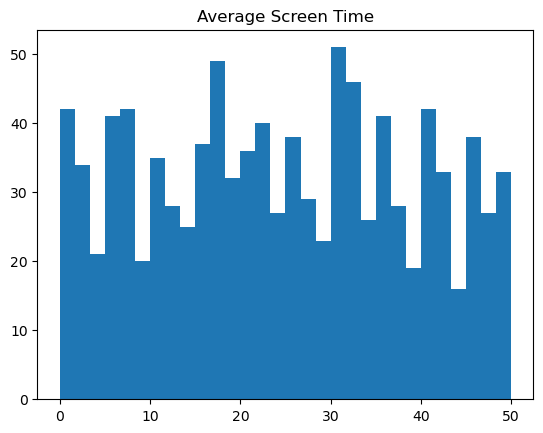

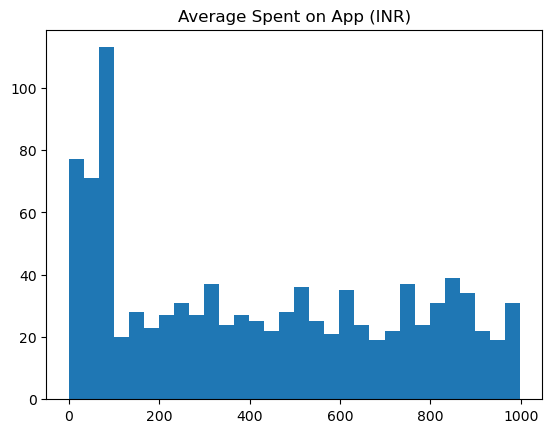

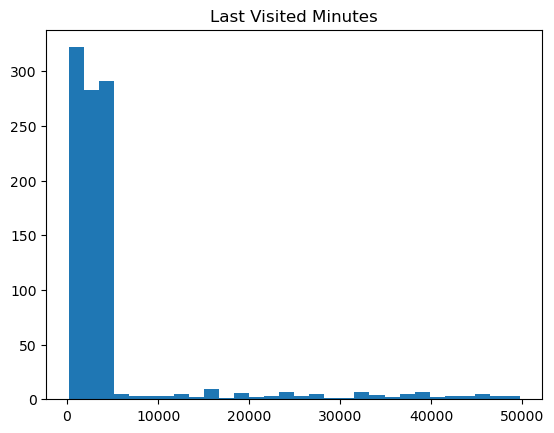

In [18]:
for i in ['Average Screen Time', 'Average Spent on App (INR)', 'Last Visited Minutes']:
    plt.hist(df[i], bins=30)
    plt.title(i)
    plt.show();

# 2

In [52]:
new_columns = ['_'.join(i.lower().replace(' (inr)', '').split()) for i in df.columns]
df.columns = new_columns

In [50]:
df['status'] = df['status'].replace({'Installed': 1, 'Uninstalled': 0})

In [53]:
df.head()

,userid,average_screen_time,average_spent_on_app,left_review,ratings,new_password_request,last_visited_minutes,status
0,1001,17.0,634.0,1,9,7,2990,1
1,1002,0.0,54.0,0,4,8,24008,0
2,1003,37.0,207.0,0,8,5,971,1
3,1004,32.0,445.0,1,6,2,799,1
4,1005,45.0,427.0,1,5,6,3668,1


# 3

In [57]:
df_copy = df.drop('userid', axis=1)

In [64]:
mm = MinMaxScaler()
mm.fit(df_copy)

df_mm = mm.transform(df_copy)
df_mm = pd.DataFrame(data=df_mm, columns=df_copy.columns)

In [67]:
df_mm.head()

,average_screen_time,average_spent_on_app,left_review,ratings,new_password_request,last_visited_minutes,status
0,0.34,0.635271,1.0,0.9,0.428571,0.056328,1.0
1,0.00,0.054108,0.0,0.4,0.500000,0.480814,0.0
2,0.74,0.207415,0.0,0.8,0.285714,0.015551,1.0
3,0.64,0.445892,1.0,0.6,0.071429,0.012077,1.0
4,0.90,0.427856,1.0,0.5,0.357143,0.070021,1.0


In [68]:
df_mm.describe()

,average_screen_time,average_spent_on_app,left_review,ratings,new_password_request,last_visited_minutes,status
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.487808,0.425266,0.497497,0.651351,0.281567,0.099162,0.916917
std,0.284708,0.312992,0.500244,0.270151,0.198902,0.173527,0.276146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240000,0.096192,0.000000,0.500000,0.142857,0.026144,1.000000
50%,0.480000,0.394790,0.000000,0.700000,0.285714,0.053803,1.000000
75%,0.720000,0.718938,1.000000,0.900000,0.428571,0.080725,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
df.describe()

,userid,average_screen_time,average_spent_on_app,left_review,ratings,new_password_request,last_visited_minutes,status
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,1500.000000,24.390390,424.415415,0.497497,6.513514,4.941942,5110.898899,0.916917
std,288.530761,14.235415,312.365695,0.500244,2.701511,2.784626,8592.036516,0.276146
min,1001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,201.000000,0.000000
25%,1250.500000,12.000000,96.000000,0.000000,5.000000,3.000000,1495.500000,1.000000
50%,1500.000000,24.000000,394.000000,0.000000,7.000000,5.000000,2865.000000,1.000000
75%,1749.500000,36.000000,717.500000,1.000000,9.000000,7.000000,4198.000000,1.000000
max,1999.000000,50.000000,998.000000,1.000000,10.000000,15.000000,49715.000000,1.000000
